<div class="alert alert-block alert-info" style="background-color: white; text-align: center;">
  <h1> BUSINESS CASE 3: Recommendation System for Recheio </h1>
  <h2> Group E _ PART 1</h2>
    
  <p>  </p>
    
  <p> Business Cases for Data Science </p>
  <p> Masters in Data Science Spealization in Business Analytics - 2023/2024 </p>
    
  <p>  </p>
    
  <p><strong style="font-weight: bold;"> Group Members: </strong></p>
  <p> - Duarte Mendes 20230494 <p>
  <p> - Dzmitry Nisht 20230776 <p>
  <p> - Inês Silva 20201580 <p>
  <p> - José Marcal 20201581 <p>
  <p> - Ricardo Sousa 20201611 <p>
    
</div>

### **Table of Contents**

* [1. Notebook Setup](#1)
* [2. Data Understanding](#2)
    * [2.1. Summary Statistics](#2_1)
    * [2.2. Visualizing Data](#2_2)  
* [3. Data Preprocessing](#3)
* [4. Export Dataset](#4)

<hr>

<a class="anchor" id="1">

# 1. Notebook Setup: Packages and Module Loading

</a>

In [1]:
# basic imports
import pandas as pd #1.5.3
import numpy as np #1.26.4
import seaborn as sns #0.12.2
import matplotlib.pyplot as plt #3.7.1

In [2]:
# show all columns // from: https://builtin.com/data-science/pandas-show-all-columns
pd.set_option('display.max_columns', None)

In [3]:
# remove warnings // from: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings # python version
warnings.filterwarnings("ignore")

**Clients Data**

In [4]:
# Import data
clients_data = pd.read_excel('Case3_Recheio_v2.xlsx', sheet_name='1. CLIENTS', header=1)

In [5]:
# Import client types
clients_type_data = pd.read_excel('Case3_Recheio_v2.xlsx', sheet_name='4. CLIENT TYPES', header=1)
clients_type_data.drop("Unnamed: 0",axis=1, inplace=True)

In [6]:
# Remove empty column
clients_data = clients_data.iloc[:,1:]

In [7]:
# Adding Location Name // from: https://en.m.wikipedia.org/wiki/File:Postal_Codes_of_Portugal.png

# Define a function to categorize Postal Codes into ranges
def categorize_postal_code(code):
    if code >= 1000 and code < 2000:
        return 'Lisboa'
    elif code >= 2000 and code < 2100:
        return 'Santarém'
    elif code >= 2000 and code < 2100:
        return 'Santarém'
    elif code >= 2100 and code < 2200:
        return 'Coruche'
    elif code >= 2200 and code < 2300:
        return 'Abrantes'
    elif code >= 2300 and code < 2400:
        return 'Tomar'
    elif code >= 2400 and code < 2500:
        return 'Leiria'
    elif code >= 2500 and code < 2600:
        return 'Caldas da Rainha'
    elif code >= 2600 and code < 2700:
        return 'Vila Franca de Xira'
    elif code >= 2700 and code < 2800:
        return 'Amadora'
    elif code >= 2800 and code < 2900:
        return 'Almada'
    elif code >= 2900 and code < 3000:
        return 'Setúbal'
    
    elif code >= 3000 and code < 3100:
        return 'Coimbra'
    elif code >= 3100 and code < 3200:
        return 'Pombal'
    elif code >= 3200 and code < 3300:
        return 'Lousã'
    elif code >= 3300 and code < 3400:
        return 'Arganil'
    elif code >= 3400 and code < 3500:
        return 'Oliveira do Hospital'
    elif code >= 3500 and code < 3600:
        return 'Viseu'
    elif code >= 3600 and code < 3700:
        return 'Castro Daire'
    elif code >= 3700 and code < 3800:
        return 'São João da Madeira'
    elif code >= 3800 and code < 3900:
        return 'Aveiro'
    
    elif code >= 4000 and code < 4400:
        return 'Porto'
    elif code >= 4400 and code < 4500:
        return 'Vila Nova de Gaia'
    elif code >= 4500 and code < 4600:
        return 'Espinho'
    elif code >= 4600 and code < 4700:
        return 'Amarante'
    elif code >= 4700 and code < 4800:
        return 'Braga'
    elif code >= 4800 and code < 4900:
        return 'Guimarães'
    elif code >= 4900 and code < 5000:
        return 'Viana do Castelo'
    elif code >= 5000 and code < 5100:
        return 'Vila Real'
    
    elif code >= 5100 and code < 5200:
        return 'Lamego'
    elif code >= 5200 and code < 5300:
        return 'Mogadouro'
    elif code >= 5300 and code < 5400:
        return 'Bragança'
    elif code >= 5400 and code < 5500:
        return 'Chaves'
    
    elif code >= 6000 and code < 6100:
        return 'Castelo Branco'
    elif code >= 6100 and code < 6200:
        return 'Sertã'
    elif code >= 6200 and code < 6300:
        return 'Covilhã'
    elif code >= 6300 and code < 6400:
        return 'Guarda'
    elif code >= 6400 and code < 6500:
        return 'Pinhel'
    
    elif code >= 7000 and code < 7100:
        return 'Évora'
    elif code >= 7100 and code < 7200:
        return 'Estremoz'
    elif code >= 7200 and code < 7300:
        return 'Reguengos de Monsaraz'
    elif code >= 7300 and code < 7400:
        return 'Portalegre'
    elif code >= 7400 and code < 7500:
        return 'Ponte de Sôr'
    elif code >= 7500 and code < 7600:
        return 'Vila Nova de Santo André'
    elif code >= 7600 and code < 7700:
        return 'Aljustel'
    elif code >= 7700 and code < 7800:
        return 'Almodôvar'
    elif code >= 7800 and code < 8000:
        return 'Beja'
    
    elif code >= 8000 and code < 8100:
        return 'Faro'
    elif code >= 8100 and code < 8200:
        return 'Loulé'
    elif code >= 8200 and code < 8300:
        return 'Albufeira'
    elif code >= 8300 and code < 8400:
        return 'Silves'
    elif code >= 8400 and code < 8500:
        return 'Lagoa'
    elif code >= 8500 and code < 8600:
        return 'Portimão'
    elif code >= 8600 and code < 8700:
        return 'Lagos'
    elif code >= 8700 and code < 8800:
        return 'Olhão'
    elif code >= 8800 and code < 8900:
        return 'Tavira'
    elif code >= 8900 and code < 9000:
        return 'Vila Real de Santo António'
    
    elif code >= 9000 and code < 9100:
        return 'Funchal'
    elif code >= 9100 and code < 9200:
        return 'Santa Cruz'
    elif code >= 9200 and code < 9300:
        return 'Machico'
    elif code >= 9300 and code < 9400:
        return 'Câmara de Lobos'
    elif code >= 9400 and code < 9500:
        return 'Porto Santo'
    
    elif code >= 9500 and code < 9600:
        return 'Ponta Delgada'
    elif code >= 9600 and code < 9700:
        return 'Ribeira Grande'
    elif code >= 9700 and code < 9800:
        return 'Angra do Heroísmo'
    elif code >= 9800 and code < 9900:
        return 'Velas'
    elif code >= 9900 and code <= 9999:
        return 'Horta'

    # Add more conditions for other ranges as needed
    else:
        return 'Other'

# Apply the function to create a new variable
clients_data['Location'] = clients_data['ZIP Code'].apply(categorize_postal_code)

In [8]:
# Adding Region Name (Simple Version) // from: https://pt.wikipedia.org/wiki/C%C3%B3digo_postal

# Define a function to categorize Postal Codes into ranges
def categorize_postal_code_region(code):
    if code >= 1000 and code < 2000:
        return 'Lisboa'
    elif code >= 2000 and code < 3000:
        return 'Vale do Tejo'
    elif code >= 3000 and code < 4000:
        return 'Beira Litoral'
    elif code >= 4000 and code < 4400:
        return 'Porto'
    elif code >= 4400 and code < 5000:
        return 'Entre-Douro-e-Minho'
    elif code >= 2300 and code < 2400:
        return 'Tomar'
    elif code >= 5000 and code < 6000:
        return 'Trás-os-Montes e Alto Douro'
    elif code >= 6000 and code < 7000:
        return 'Beira Interior'
    elif code >= 7000 and code < 8000:
        return 'Alentejo'
    elif code >= 8000 and code < 9000:
        return 'Algarve'
    elif code >= 9000 and code < 9500:
        return 'Madeira'
    elif code >= 9500 and code < 9999:
        return 'Açores'
    
    # Add more conditions for other ranges as needed
    else:
        return 'Other'

# Apply the function to create a new variable
clients_data['Region'] = clients_data['ZIP Code'].apply(categorize_postal_code_region)

**Products Data**

In [9]:
# Import data
products_data = pd.read_excel('Case3_Recheio_v2.xlsx', sheet_name='2. PRODUCTS', header=1)

In [10]:
# Remove empty column
products_data = products_data.iloc[:,1:]

**Transactions Data**

In [11]:
# Import data
transactions_data = pd.read_excel('Case3_Recheio_v2.xlsx', sheet_name='3. TRANSACTIONS', header=1)

In [12]:
# Remove empty column
transactions_data = transactions_data.iloc[:,1:]

<hr>

<a class="anchor" id="2">

# 2. Data Understanding

</a>

<hr>

<a class="anchor" id="2_1">

## 2.1. Summary Statistics

</a>

**CLIENTS**

In [13]:
clients_data.head()

,Client ID,ZIP Code,ID Client Type,Location,Region
0,63,2645,217,Vila Franca de Xira,Vale do Tejo
1,226,2765,201,Amadora,Vale do Tejo
2,228,1350,206,Lisboa,Lisboa
3,282,1250,201,Lisboa,Lisboa
4,357,1250,210,Lisboa,Lisboa


In [14]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Client ID       930 non-null    int64 
 1   ZIP Code        930 non-null    int64 
 2   ID Client Type  930 non-null    int64 
 3   Location        930 non-null    object
 4   Region          930 non-null    object
dtypes: int64(3), object(2)
memory usage: 36.5+ KB


In [15]:
# Data is being analyzed as numerical
clients_data.describe()

,Client ID,ZIP Code,ID Client Type
count,930.000000,930.000000,930.000000
mean,6796.659140,2161.223656,211.145161
std,2127.373099,1132.993351,9.783304
min,63.000000,1000.000000,201.000000
25%,4981.250000,1200.000000,202.000000
50%,7684.000000,2050.000000,209.000000
75%,8413.750000,2750.000000,219.000000
max,8912.000000,9500.000000,236.000000


In [16]:
# Again but as categories
clients_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Client ID,930.0,6796.659140,2127.373099,63.0,4981.25,7684.0,8413.75,8912.0
ZIP Code,930.0,2161.223656,1132.993351,1000.0,1200.00,2050.0,2750.00,9500.0
ID Client Type,930.0,211.145161,9.783304,201.0,202.00,209.0,219.00,236.0


In [17]:
# Duplicates
clients_data.duplicated().sum()

0

In [18]:
# Missing Values
clients_data.isnull().sum()

Client ID         0
ZIP Code          0
ID Client Type    0
Location          0
Region            0
dtype: int64

In [19]:
# function to count the unique values in a category // from: ChatGPT 3.5 generation
def print_unique_counts(df, col):
    
    unique_counts = df[col].value_counts()
    total_count = unique_counts.sum()
    print(f"{col} unique values:\n")
    
    for value, count in unique_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")

In [20]:
# for each category apply the function
for i in ["Location", "Region"]:
    print_unique_counts(clients_data, i)
    print("\n")

Location unique values:

Lisboa: 459 (49.35%)
Amadora: 188 (20.22%)
Vila Franca de Xira: 126 (13.55%)
Almada: 85 (9.14%)
Setúbal: 30 (3.23%)
Vila Nova de Santo André: 17 (1.83%)
Santarém: 7 (0.75%)
Coruche: 4 (0.43%)
Leiria: 2 (0.22%)
Caldas da Rainha: 2 (0.22%)
Lousã: 2 (0.22%)
Olhão: 1 (0.11%)
Ponta Delgada: 1 (0.11%)
Arganil: 1 (0.11%)
Silves: 1 (0.11%)
Beja: 1 (0.11%)
Tomar: 1 (0.11%)
Braga: 1 (0.11%)
Castelo Branco: 1 (0.11%)


Region unique values:

Lisboa: 459 (49.35%)
Vale do Tejo: 445 (47.85%)
Alentejo: 18 (1.94%)
Beira Litoral: 3 (0.32%)
Algarve: 2 (0.22%)
Açores: 1 (0.11%)
Entre-Douro-e-Minho: 1 (0.11%)
Beira Interior: 1 (0.11%)




Main Ideas:
* 3 columns
* 930 distinct clients
* 28 types of clients
* No missing values
* No duplicates

**PRODUCTS**

In [21]:
products_data.head()

,ID Product,Product Description,ID Product Category
0,110110,ACUCAR MCHEF BRANCO PAPEL KG,BENS ESSENCIAIS
1,110211,AÇÚCAR SIDUL AMARELO 1KG,BENS ESSENCIAIS
2,110401,OLEO ALIMENTAR MCHEF 1 LT,BENS ESSENCIAIS
3,110406,OLEO FULA ALIMENTAR 1 LT,BENS ESSENCIAIS
4,110408,ÓLEO VAQUEIRO ALIMENTAR 1 LT,BENS ESSENCIAIS


In [22]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID Product           2498 non-null   int64 
 1   Product Description  2498 non-null   object
 2   ID Product Category  2498 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.7+ KB


In [23]:
# Lets transform into categorical
products_data['ID Product'] = products_data['ID Product'].astype('category')

In [24]:
# Describe products datasets
products_data.describe().T

,count,unique,top,freq
ID Product,2498,2498,110110,1
Product Description,2498,2497,QJ BRIE MG 60% CUNHA PRESIDENT 200G,2
ID Product Category,2498,33,ALIMENTACAO CORRENTE,538


In [25]:
# Rows
test = products_data[products_data["Product Description"] == "QJ BRIE MG 60% CUNHA PRESIDENT 200G"]
test

,ID Product,Product Description,ID Product Category
971,263811,QJ BRIE MG 60% CUNHA PRESIDENT 200G,QUEIJOS
972,263829,QJ BRIE MG 60% CUNHA PRESIDENT 200G,QUEIJOS


In [26]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)


transactions_data[(transactions_data["ID Product"]==263811) | (transactions_data["ID Product"]==263829)]

# Reset display options to default for max rows
pd.reset_option('display.max_rows')

In [27]:
# Count products per group
product_counts = products_data.groupby('ID Product Category').size().sort_values(ascending=False)
product_counts

ID Product Category
ALIMENTACAO CORRENTE     538
FRUTAS E VEGETAIS        256
VINHO                    206
CONGELADOS               206
TALHO                    167
TAKE-AWAY                151
PEIXARIA                 137
BENS ESSENCIAIS          130
DESTILADOS               110
PROD. CONFEITARIA        109
REFRIGERANTES             74
HIGIENE LAR               66
QUEIJOS                   60
PRODUTOS LACTEOS          57
RESTAURAÇÃO               49
CHARCUTARIA               46
AGUAS                     23
HIGIENE PESSOAL           23
LEITE                     22
CERVEJA                   18
PADARIA/PASTELARIA         9
PAPELARIA                  6
CASA E JARDIM              6
OVOS                       5
PRONTO A COMER             5
DETERGENTES                5
BACALHAU                   5
MENAGE                     4
HOMEM                      1
ENTREGAS AO DOMICILIO      1
QUINQUILHARIA              1
SENHORA                    1
TEXTIL LAR                 1
dtype: int64

In [28]:
# Iterate over each group
for group, count in product_counts.items():
    # Filter products belonging to the current group
    group_products = products_data[products_data['ID Product Category'] == group]['Product Description']
    
    # Print group name and products belonging to it
    print(f"Group: {group} (Total Products: {count})")
    for product in group_products:
        print(f"  - {product}")


Group: ALIMENTACAO CORRENTE (Total Products: 538)
  - SAL AMANHECER MESA 250GR
  - SAL MCHEF GROSSO KG
  - FLOR DE SAL VATEL 175G
  - FLOR SAL MCHEF 250GR
  - VINAGRE BR M CHEF 1LT
  - FEIJÃO PRETO GULOSO 2,5KG
  - FEIJAO PRETO GULOSO 820GR
  - GRAO GULOSO 820GR
  - LENTILHAS CISTER VERDES 500GR
  - LENTILHAS EXT DIAMIR 2,5 KG
  - LENTILHAS AMANH VERDES 500GR
  - FARINHA ALFARROBA CEM PORCENTO 250G
  - ATUM C.POVEIRO POSTA OLEO 110G
  - ATUM AMANH POSTA OLEO 120GR
  - SARDINHA EM TOMATE LÍDER 120G
  - FILETE ANCHOVA 1/8 AF DIAMIR 45 GR
  - SALSICHAS AMANHECER 4 PARES
  - SALSICHA BOCKW FRS IZIDORO 8UN
  - SALSICHAS ALEMAS MASTERCHEF 8UN 1030G
  - SALSICHAS ALEMAS MASTERCHEF 10UN 680G
  - COGUMELOS CORTADOS FERBA 780G
  - COGUMELOS MAST.CHEF LAMIN.780GR
  - COGUMELOS SETAS 2,65KG
  - COGUMELOS INT FERBA 780
  - BAKED BEANS U.THOMAS420G
  - FEIJAO AMANHECER PRETO 420GR
  - FEIJAO MCHEF ENCARN.LATA 820GR
  - FEIJAO MCHEF PRETO LATA 820GR
  - MILHO MCHEF DOCE 300GR
  - MILHO DOCE GULOSO 30

In [29]:
# Iterate over each product
for i in sorted(products_data['Product Description']):    
    # Print group name and products belonging to it
    print(f"{i}")

* CALDO VERDE
* CREME DE CENOURA
* CREME DE LEGUMES
* CREME VEGETAIS C/ESPINAFRES (S/BATATA)
* SOPA DE FEIJAO BRANCO C/COUVE CORACAO
* SOPA DE FEIJÃO VERDE
* SOPA DE GRÃO C/ESPINAFRES
* SOPA DE LEGUMES
* SOPA DE LEGUMES SEM BATATA
* SOPA FJ. ENCARNADO C/ LEGUMES
* SOPA JULIANA
* SOPA NABICAS
* SOPA REFRIG CALDO VERDE 900GR
* SOPA REFRIG CREME DE CENOURA 900GR
* SOPA REFRIG DE AGRIÃO 900GR
5 PIMENTAS EM GRÃO DIAMIR PET 700G
ABACATE EM CUBOS 15X15MM SC2,5KG CONG
ABACATE HASS MATURADO RCH
ABACATE RCH
ABACAXI 5/6 PLUMP
ABACAXI 7 PLUMP
ABACAXI CAL 7/8 RCH
ABACAXI CAL5/6 DELMONTE RCH
ABACAXI CAL5/6 RCH
ABACAXI DESCASCADO CUBOS 1500G 4G RCH
ABOBORA RCH
ABRAS AMANH ACTIV LIX GEL 1500ML
ABRILHANTADOR MCHEF SEC 5LT
ABÓBORA CUBOS 1 KG 4G RCH
ACAFRAO INDIA JANOTA PAC 1KG
ACENDALHA AMANHECER BCO 32 CUBOS
ACHOCOLATADO AMANHECER 400GR
ACHOCOLATADO NESQUIK 800GR
ACTIMEL 6X100G, NATURAL
ACUCAR  GOURMÊS SAQ 6GR CX1200
ACUCAR BRANCO RAR 25KG
ACUCAR EM PÓ SIDUL  500G
ACUCAR MCHEF BRANCO PAPEL KG
ACUCAR MC

In [30]:
# See products with *
filtered_productsX = products_data[products_data['Product Description'].str.contains('\* ', regex=True)]
print(filtered_productsX)

    ID Product                       Product Description ID Product Category
507     216540                        * CREME DE LEGUMES         RESTAURAÇÃO
508     216541                         * SOPA DE LEGUMES         RESTAURAÇÃO
509     216542                             * CALDO VERDE         RESTAURAÇÃO
510     216544   * SOPA DE FEIJAO BRANCO C/COUVE CORACAO         RESTAURAÇÃO
512     216547               * SOPA DE GRÃO C/ESPINAFRES         RESTAURAÇÃO
513     216548                            * SOPA JULIANA         RESTAURAÇÃO
514     216549  * CREME VEGETAIS C/ESPINAFRES (S/BATATA)         RESTAURAÇÃO
516     216551           * SOPA FJ. ENCARNADO C/ LEGUMES         RESTAURAÇÃO
517     216552                        * CREME DE CENOURA         RESTAURAÇÃO
518     216553                            * SOPA NABICAS         RESTAURAÇÃO
521     216561                    * SOPA DE FEIJÃO VERDE         RESTAURAÇÃO
547     216941           * SOPA REFRIG CALDO VERDE 900GR           TAKE-AWAY

In [31]:
# Duplicates
products_data.duplicated().sum()

0

In [32]:
# Missing Values
products_data.isnull().sum()

ID Product             0
Product Description    0
ID Product Category    0
dtype: int64

Main Ideas of PRODUCTS:

* 3 columns
* 2498 distinct products
* 2 products have the same description (but different code)
* 33 categories of products
* No missing values
* No duplicates

**TRANSACTIONS**

In [33]:
transactions_data.head()

,Date,Client ID,ID Product
0,2019-03-01,4442,291708
1,2019-03-01,4442,291726
2,2019-03-01,4442,291756
3,2019-03-01,4442,293029
4,2019-03-01,4442,293330


In [34]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234224 entries, 0 to 234223
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        234224 non-null  datetime64[ns]
 1   Client ID   234224 non-null  int64         
 2   ID Product  234224 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.4 MB


In [35]:
# Describe transaction datasets
transactions_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Client ID,234224.0,6643.565600,1999.360383,63.0,4916.0,7368.0,8230.0,8912.0
ID Product,234224.0,370472.097812,200575.916007,110110.0,230617.0,291609.0,516711.0,888819.0


In [36]:
# Duplicates
products_data.duplicated().sum()

0

In [37]:
# Missing Values
clients_data.isnull().sum()

Client ID         0
ZIP Code          0
ID Client Type    0
Location          0
Region            0
dtype: int64

In [38]:
# Group by Date and Client ID, then count the number of products for each visit or sale
products_per_visit = transactions_data.groupby(["Date", "Client ID"])["ID Product"].count()

# Filter out rows where the product count is zero
products_per_visit = products_per_visit[products_per_visit > 0]

# Transform into a DataFrame
products_per_visit = pd.DataFrame(products_per_visit)

# Get Statistics
products_per_visit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID Product,17607.0,13.302891,11.909466,1.0,4.0,10.0,19.0,138.0


In [39]:
products_per_visit.sort_values("ID Product", ascending=False)

ID Product
Date       Client ID            
2019-05-17 8861              138
2019-03-29 7014              112
2019-03-20 7460              108
2019-05-31 7014              102
2019-04-09 7540               90
...                          ...
2019-04-12 8777                1
           8691                1
2019-05-23 4810                1
2019-04-12 8621                1
2019-04-08 8369                1

[17607 rows x 1 columns]

Main Ideas of PRODUCTS:

* 3 columns
* 234224 transactions
* All clients and products appear on the transactions
* In average, a client buys 13 products
* 50% of clients buys less or 10 products
* The minimum products bough is 1 while the maximum is 138
<!-- * No missing values -->
* No duplicates

<hr>

<a class="anchor" id="2_2">

## 2.2. Visualizing Data

</a>

### Merging Dataset (needed for Visualization Purposes)

In [40]:
# Merging transactions & clients data
data = transactions_data.merge(clients_data, on="Client ID", how="left")

In [41]:
# Merging products & previous data
data = data.merge(products_data, on="ID Product", how="left")

In [42]:
# Merging client types & previous data
data = data.merge(clients_type_data, on="ID Client Type", how="left")

In [43]:
# Saving copy
data_viz = data.copy()

**CLIENTS**

In [44]:
clients_viz = clients_data.copy()

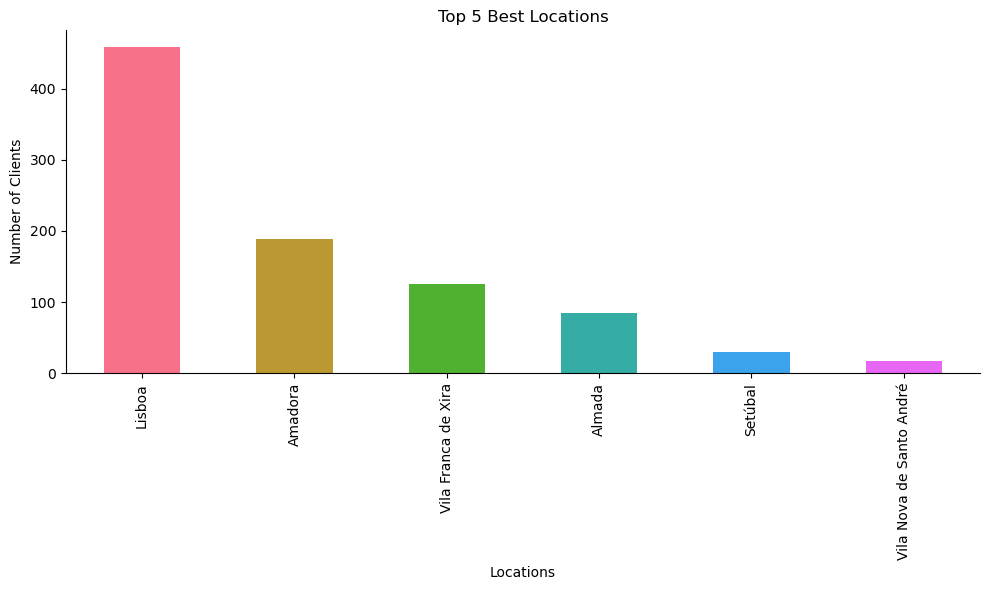

In [45]:
clients_by_location_counts = clients_viz['Location'].value_counts()
top_locations = clients_by_location_counts.sort_values(ascending=False)[:6]

plt.figure(figsize=(10, 6))
ax = top_locations.plot(kind='bar', color=sns.color_palette('husl'))

# decoration
ax.set_title('Top 5 Best Locations')
ax.set_xlabel('Locations')
ax.set_ylabel('Number of Clients')
plt.tight_layout()
sns.despine()
plt.show()


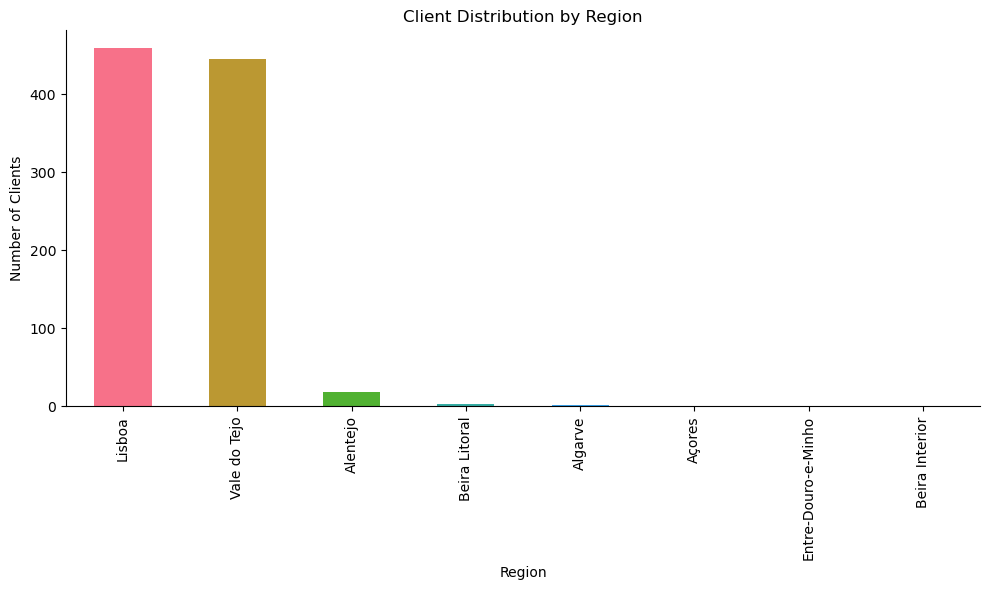

In [46]:
clients_by_region_counts = clients_viz['Region'].value_counts()

plt.figure(figsize=(10, 6))
ax = clients_by_region_counts.plot(kind='bar', color=sns.color_palette('husl'))

# decoration
ax.set_title('Client Distribution by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Clients')
plt.tight_layout()
sns.despine()
plt.show()

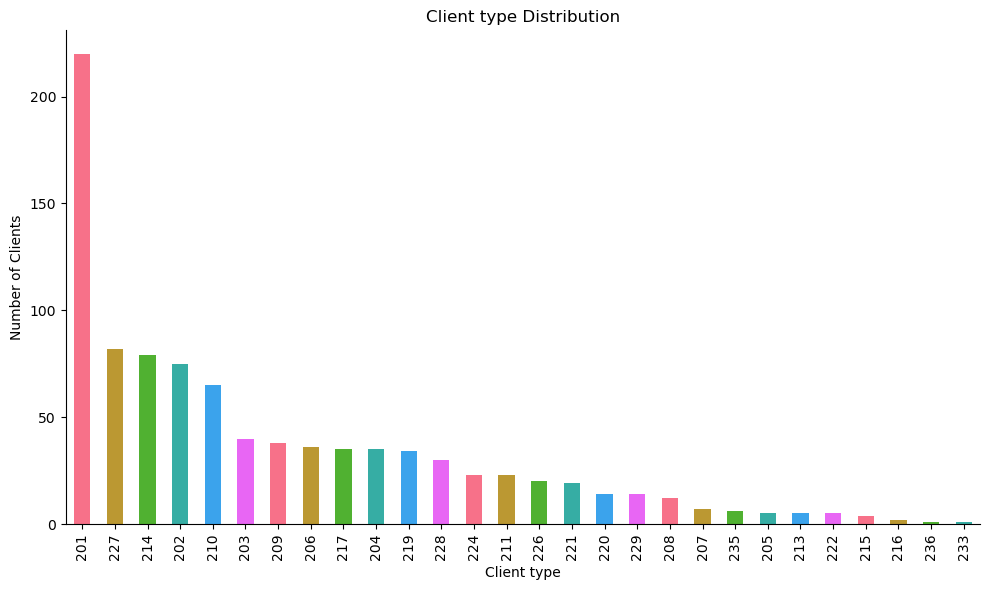

In [47]:
client_type_counts = clients_viz['ID Client Type'].value_counts()

plt.figure(figsize=(10, 6))
ax = client_type_counts.plot(kind='bar', color=sns.color_palette('husl'))

# decoration
ax.set_title('Client type Distribution')
ax.set_xlabel('Client type')
ax.set_ylabel('Number of Clients')
plt.tight_layout()
sns.despine()
plt.show()

**PRODUCTS**

In [48]:
products_viz = products_data.copy()

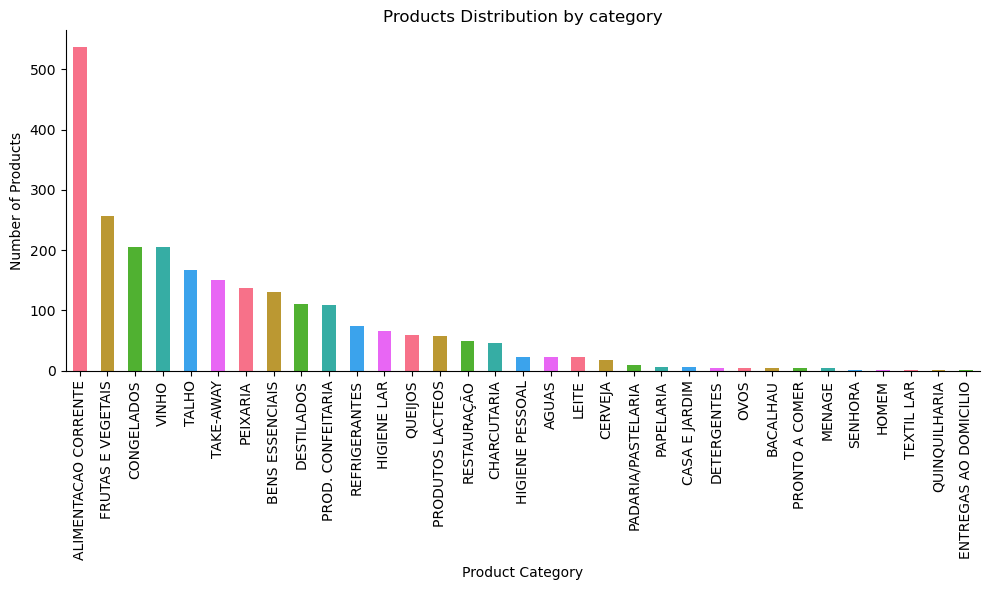

In [49]:
product_categories_counts = products_viz['ID Product Category'].value_counts()

plt.figure(figsize=(10, 6))
ax = product_categories_counts.plot(kind='bar', color=sns.color_palette('husl'))

# decoration
ax.set_title('Products Distribution by category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Products')
plt.tight_layout()
sns.despine()
plt.show()

**TRANSACTIONS**

In [50]:
transactions_viz = transactions_data.copy()

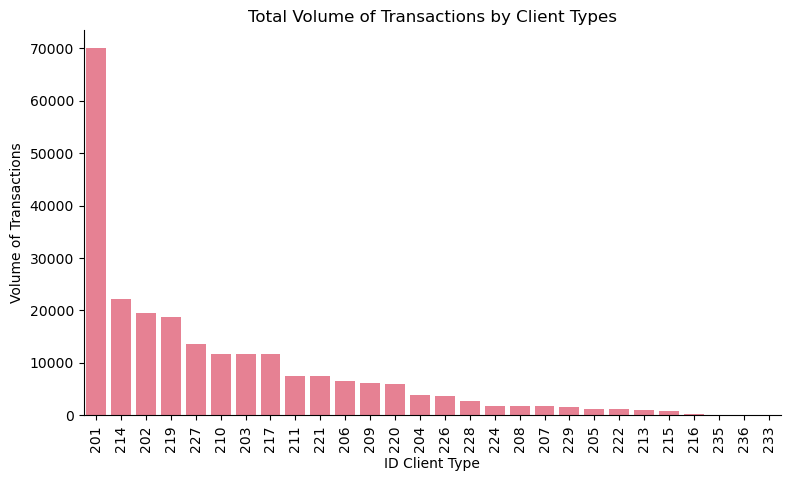

In [51]:
# Calculate total sales by ID Client Type
transactions_by_client_type = data_viz['ID Client Type'].value_counts()

# Sort by descending volume of transactions
transactions_by_client_type = transactions_by_client_type.sort_values(ascending=False)
transactions_by_client_type.index = transactions_by_client_type.index.astype('str')

# Create bar chart
plt.figure(figsize=(9,5))
sns.barplot(x=transactions_by_client_type.index, y=transactions_by_client_type.values, color=sns.color_palette('husl')[0])
plt.xlabel('ID Client Type')
plt.xticks(rotation=90)
plt.ylabel('Volume of Transactions')
plt.title('Total Volume of Transactions by Client Types')

sns.despine()
plt.show()

In [52]:
transactions_by_client_type

201    69986
214    22114
202    19531
219    18641
227    13611
210    11750
203    11744
217    11620
211     7516
221     7464
206     6584
209     6206
220     5952
204     3862
226     3590
228     2786
224     1805
208     1746
207     1669
229     1605
205     1259
222     1114
213      957
215      761
216      272
235       51
236       18
233       10
Name: ID Client Type, dtype: int64

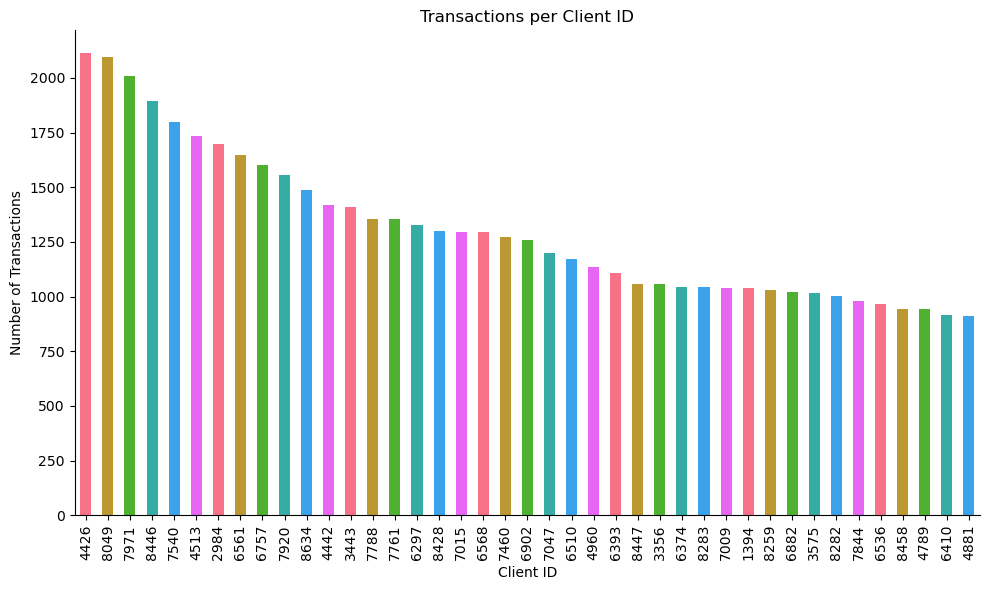

In [53]:
transactions_by_client_counts = transactions_viz['Client ID'].value_counts()
top_clients = transactions_by_client_counts.sort_values(ascending=False)[:41]

plt.figure(figsize=(10, 6))
ax = top_clients.plot(kind='bar', color=sns.color_palette('husl'))

# decoration
ax.set_title('Transactions per Client ID')
ax.set_xlabel('Client ID')
ax.set_ylabel('Number of Transactions')
plt.tight_layout()
sns.despine()
plt.show()

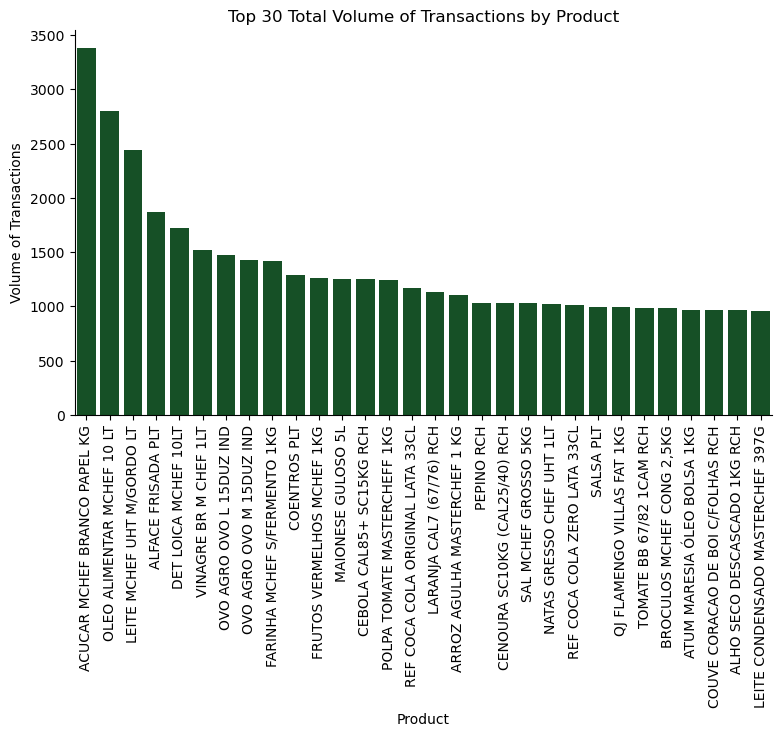

In [54]:
# Calculate total transactions volume by Product
transactions_by_prod_description = data_viz.groupby('Product Description')['ID Product'].count()

# Sort by descending transactions volume
transactions_by_prod_description = transactions_by_prod_description.sort_values(ascending=False).head(30)

# Create bar chart
plt.figure(figsize=(9,5))
sns.barplot(x=transactions_by_prod_description.index, y=transactions_by_prod_description.values, color='#0D5922')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Volume of Transactions')
plt.title('Top 30 Total Volume of Transactions by Product')

sns.despine()
plt.show()

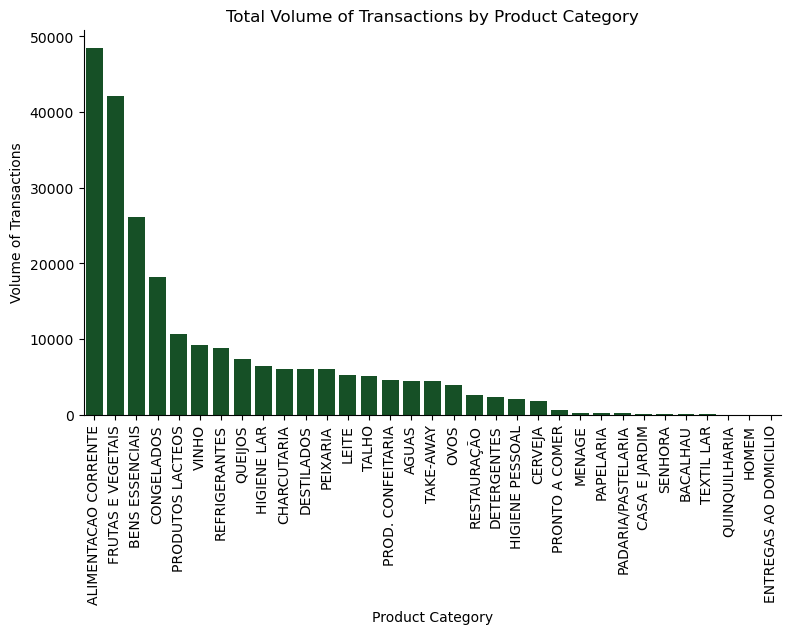

In [55]:
# Calculate total volume of transactions by ID Product Category
transactions_by_prod_category = data_viz.groupby('ID Product Category')['ID Product'].count()

# Sort by descending volume of transactions
transactions_by_prod_category = transactions_by_prod_category.sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(9,5))
sns.barplot(x=transactions_by_prod_category.index, y=transactions_by_prod_category.values, color='#0D5922')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.ylabel('Volume of Transactions')
plt.title('Total Volume of Transactions by Product Category')

sns.despine()
plt.show()

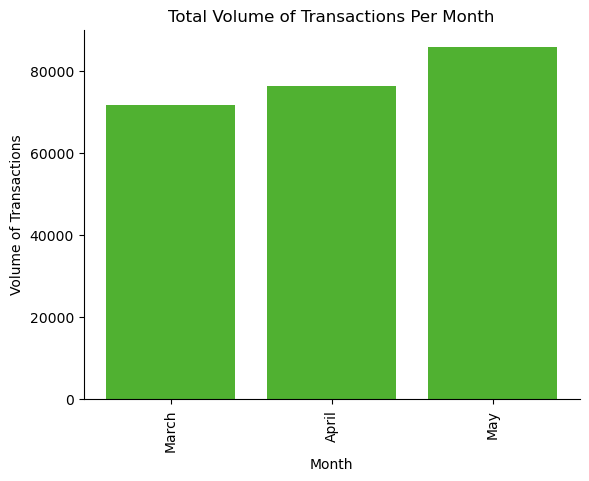

In [56]:
# Extract month name
data_viz['Month'] = data_viz['Date'].dt.strftime('%B')

# Define the order of the months
Months = ['March', 'April', 'May']

# Calculate total amount spent by date
transactions_monthly = data_viz[data_viz['Month'].isin(Months)].groupby('Month')['ID Product'].count()

# Reindex the data to the order of Months
transactions_monthly = transactions_monthly.reindex(Months)

# Create bar chart
plt.bar(Months, transactions_monthly.values, color=sns.color_palette('husl')[2])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Volume of Transactions')
plt.title('Total Volume of Transactions Per Month')

sns.despine()
plt.show()

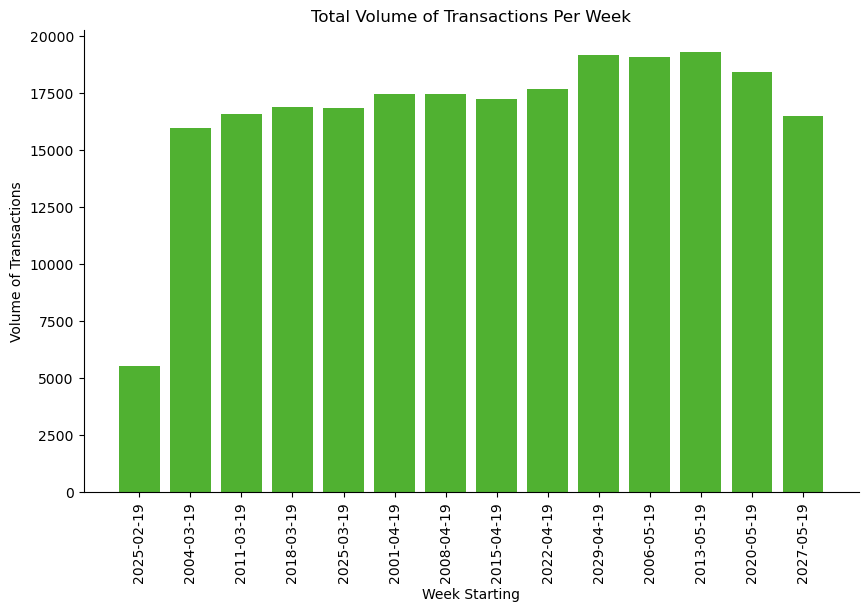

In [57]:
# Calculate the start of each week
data_viz['Week Start'] = data_viz['Date'].apply(lambda x: x - pd.DateOffset(days=x.weekday()))
data_viz['Week Start'] = data_viz['Week Start'].dt.strftime('%y/%m/%d')

# Calculate total transactions per week
transactions_weekly = data_viz.groupby('Week Start')['ID Product'].count()

# Convert index to DatetimeIndex
transactions_weekly.index = pd.to_datetime(transactions_weekly.index)

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(transactions_weekly.index.strftime('%Y-%m-%d'), transactions_weekly.values, color=sns.color_palette('husl')[2])
plt.xticks(rotation=90)
plt.xlabel('Week Starting')
plt.ylabel('Volume of Transactions')
plt.title('Total Volume of Transactions Per Week')

sns.despine()
plt.show()

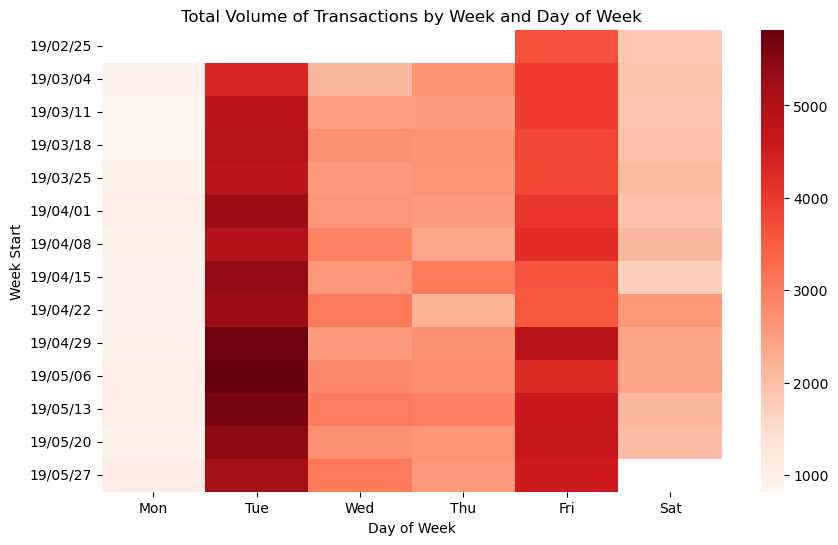

In [58]:
# Calculate total transactions per week and day of week
data_viz['Day of Week'] = data_viz['Date'].dt.dayofweek
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}  # Updated mapping
data_viz['Day of Week'] = data_viz['Day of Week'].map(days)
transactions_weekly = data_viz.groupby(['Week Start', 'Day of Week'])['ID Product'].count().reset_index()

# Pivot the data to create a matrix
transactions_matrix = transactions_weekly.pivot(columns='Day of Week', index='Week Start', values='ID Product')

# Reorder the columns to match the desired order
column_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
transactions_matrix = transactions_matrix[column_order]


# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(transactions_matrix, cmap='Reds')
plt.title('Total Volume of Transactions by Week and Day of Week')

plt.show()


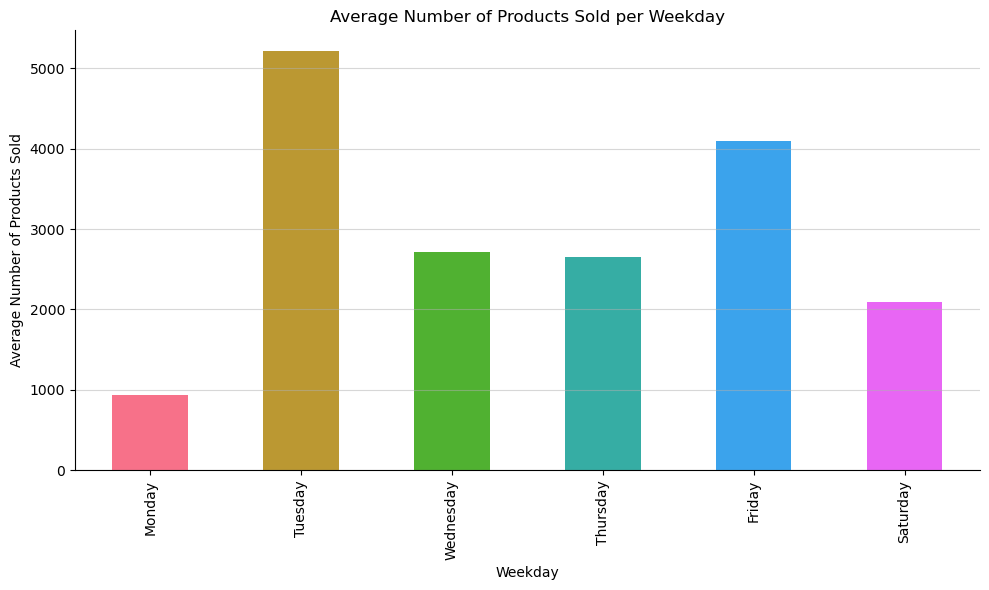

In [59]:
# Group by Date and count the number of products
products_per_date = transactions_data.groupby('Date').size()

# Calculate average number of products per weekday
average_products_per_weekday = products_per_date.groupby(products_per_date.index.dayofweek).mean()

# Define the weekdays labels // from: https://www.shecodes.io/athena/10185-how-to-check-what-day-of-the-week-it-is-in-python
weekday_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the index to the corresponding weekday labels
average_products_per_weekday.index = average_products_per_weekday.index.map(weekday_labels)

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_products_per_weekday.plot(kind='bar', color=sns.color_palette('husl'))
plt.title('Average Number of Products Sold per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Number of Products Sold')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
sns.despine()
plt.show()

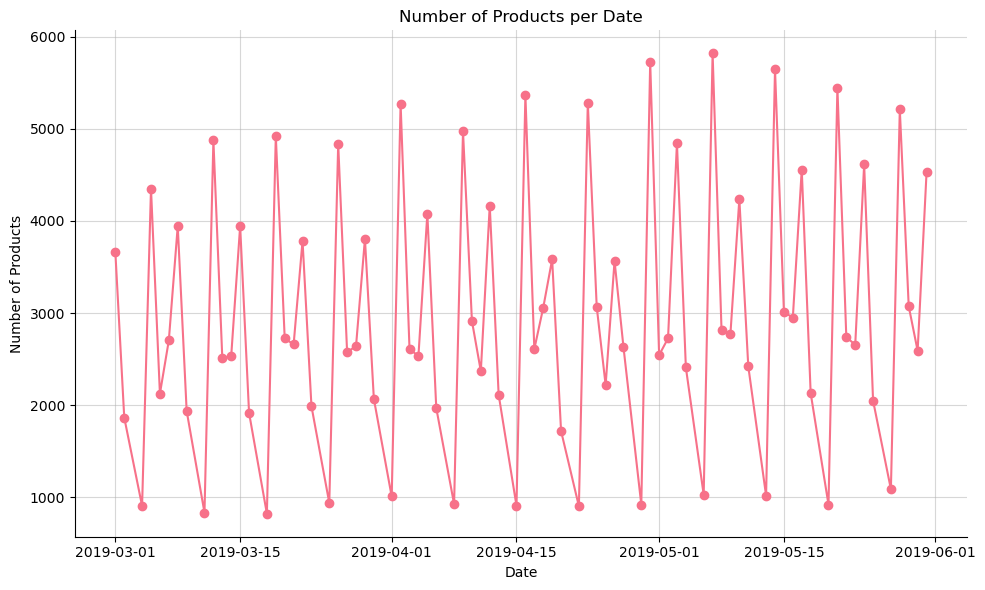

In [60]:
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(products_per_date.index, products_per_date.values, marker='o', linestyle='-', color=sns.color_palette('husl')[0])
plt.title('Number of Products per Date')
plt.xlabel('Date')
plt.ylabel('Number of Products')
plt.grid(True, alpha=0.5)
plt.tight_layout()
sns.despine()
plt.show()

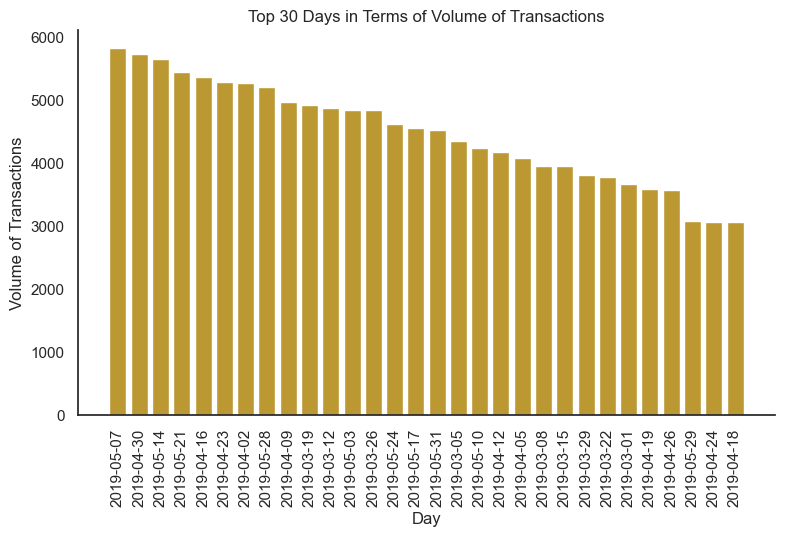

In [61]:
# Calculate total transactions per day
transactions_daily = data_viz.groupby(['Date'])['ID Product'].count().reset_index()

# Sort the values by 'ID Product' and get the top 30
df_top30 = transactions_daily.nlargest(30, 'ID Product')

# Create a bar plot
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the bar chart
ax.bar(range(30), df_top30['ID Product'], color=sns.color_palette('husl')[1])

# Set the title and labels
ax.set_title('Top 30 Days in Terms of Volume of Transactions')
ax.set_xlabel('Day')
ax.set_ylabel('Volume of Transactions')

# Set the tick labels to the corresponding day
ax.set_xticks(range(30))
ax.set_xticklabels(df_top30['Date'].dt.strftime('%Y-%m-%d'), rotation=90)

sns.despine()
plt.show()

<hr>

<a class="anchor" id="3">

# 3. Data Preprocessing

</a>

In [62]:
clients_data.head()

,Client ID,ZIP Code,ID Client Type,Location,Region
0,63,2645,217,Vila Franca de Xira,Vale do Tejo
1,226,2765,201,Amadora,Vale do Tejo
2,228,1350,206,Lisboa,Lisboa
3,282,1250,201,Lisboa,Lisboa
4,357,1250,210,Lisboa,Lisboa


In [63]:
products_data.head()

,ID Product,Product Description,ID Product Category
0,110110,ACUCAR MCHEF BRANCO PAPEL KG,BENS ESSENCIAIS
1,110211,AÇÚCAR SIDUL AMARELO 1KG,BENS ESSENCIAIS
2,110401,OLEO ALIMENTAR MCHEF 1 LT,BENS ESSENCIAIS
3,110406,OLEO FULA ALIMENTAR 1 LT,BENS ESSENCIAIS
4,110408,ÓLEO VAQUEIRO ALIMENTAR 1 LT,BENS ESSENCIAIS


In [64]:
transactions_data.head()

,Date,Client ID,ID Product
0,2019-03-01,4442,291708
1,2019-03-01,4442,291726
2,2019-03-01,4442,291756
3,2019-03-01,4442,293029
4,2019-03-01,4442,293330


* The data is clean, no numerical data to see outliers, no missing values

**Treating repeated product name**

*HYPOTHESIS*

"The data came from a Datawarehouse(DW), and sometimes in DW systems, multiple records of the same entity, a product for example, are maintained. These are called SCD – Slowly Changing Dimensions, and they are applied in situations where a product might have a certain price until a certain date and another price after that date. I guess the data export mechanism got a situation like this."

*REALITY*

"The product code is altered every time a small alteration is made to its package, since a new code needs to be generated"

In [65]:
# Replacing old "queijo" code
products_data['ID Product'] = products_data['ID Product'].replace('263811', '263829')

**DATA TYPES**

In [66]:
# Reorder and delete ZIP Code
data = data[['Date', 'Client ID', 'ID Client Type', 'Cliente Type Description','Location', 'Region', 'ID Product',
             'Product Description', 'ID Product Category']]

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234224 entries, 0 to 234223
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      234224 non-null  datetime64[ns]
 1   Client ID                 234224 non-null  int64         
 2   ID Client Type            234224 non-null  int64         
 3   Cliente Type Description  234224 non-null  object        
 4   Location                  234224 non-null  object        
 5   Region                    234224 non-null  object        
 6   ID Product                234224 non-null  object        
 7   Product Description       234224 non-null  object        
 8   ID Product Category       234224 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.9+ MB


In [68]:
# Change types to category
data['Client ID'] = data['Client ID'].astype('category')
data['ID Client Type'] = data['ID Client Type'].astype('category')
data['Cliente Type Description'] = data['Cliente Type Description'].astype('category')
data['ID Product'] = data['ID Product'].astype('category')
data['Location'] = data['Location'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Product Description'] = data['Product Description'].astype('category')
data['ID Product Category'] = data['ID Product Category'].astype('category')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234224 entries, 0 to 234223
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      234224 non-null  datetime64[ns]
 1   Client ID                 234224 non-null  category      
 2   ID Client Type            234224 non-null  category      
 3   Cliente Type Description  234224 non-null  category      
 4   Location                  234224 non-null  category      
 5   Region                    234224 non-null  category      
 6   ID Product                234224 non-null  category      
 7   Product Description       234224 non-null  category      
 8   ID Product Category       234224 non-null  category      
dtypes: category(8), datetime64[ns](1)
memory usage: 6.2 MB


**CAPITALIZE WORDS**

In [70]:
# Define a custom function to capitalize the first letter of each word
def capitalize_first_letter(text):
    return ' '.join(word.capitalize() for word in text.split())

data['Product Description'] = data['Product Description'].apply(capitalize_first_letter)
data['ID Product Category'] = data['ID Product Category'].apply(capitalize_first_letter)
data['Cliente Type Description'] = data['Cliente Type Description'].apply(capitalize_first_letter)

**FILTER OUT**

In [71]:
# Filter out some Client Type (asked by)
filter_1 = (data["Cliente Type Description"] == "Fornecedor") | (data["Cliente Type Description"] == "Colaborador")

# Shape
print("Shape:",data[filter_1].shape)

# Unique transactions
print("Count unique transactions:", len(data[filter_1][["Date", "Client ID"]].drop_duplicates()))

Shape: (69, 9)
Count unique transactions: 35


In [72]:
# Filter some Location (asked by) - OPTION 1
filter_2 = (data["Region"] != "Vale do Tejo") & (data["Region"] != "Lisboa")

# Shape
print("Shape:",data[filter_2].shape)

# Unique transactions
print("Count unique transactions:", len(data[filter_2][["Date", "Client ID"]].drop_duplicates()))

Shape: (2706, 9)
Count unique transactions: 211


In [73]:
# Filter some Location (asked by) - OPTION 2
filter_3 = (data["Region"] != "Vale do Tejo") & (data["Region"] != "Lisboa") & (data["Location"]!="Vila Nova de Santo André")

# Shape
print("Shape:",data[filter_3].shape)

# Unique transactions
print("Count unique transactions:", len(data[filter_3][["Date", "Client ID"]].drop_duplicates()))

Shape: (192, 9)
Count unique transactions: 36


* With the idea that the portuguese code has some problems distinguishing or defining certain districts (in this case Setúbal / Alentejo). Customers from Vila Nova de Santo André are in ZIP Code notation part of the Alentejo distrinct, but possible are part of Setúbal... 

* Even with this in mind we removed these rows, just as alignment with what was said

In [74]:
# Remmove Annual Rappel
data = data[data["Product Description"] != "Rappel Anual"]

# remove not in filter 1
data = data[~filter_1]

# remove not in filter 3
data=data[~filter_2]

**CORRECTING PRODUCTS NAMES**

In [75]:
# Sample data
new_data = data[["Product Description"]].drop_duplicates().reset_index(drop=True)

# Split text into tokens
tokens_df = new_data["Product Description"].str.split(expand=True)

# Rename columns to token_i
tokens_df.columns = [f'token_{i+1}' for i in range(tokens_df.shape[1])]

# Concatenate the token DataFrame with the original DataFrame
new_data = pd.concat([new_data, tokens_df], axis=1)

new_data


,Product Description,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10
0,"Couve Flor Mchef 2,5kg",Couve,Flor,Mchef,"2,5kg",None,None,None,None,None,None
1,"Espinafres Folhas Cong Masterchef 2,5",Espinafres,Folhas,Cong,Masterchef,"2,5",None,None,None,None,None
2,"Broculos Mchef Cong 2,5kg",Broculos,Mchef,Cong,"2,5kg",None,None,None,None,None,None
3,Grelos Amanh Cg 1kg,Grelos,Amanh,Cg,1kg,None,None,None,None,None,None
4,"Gel.cat.gourmes Baunilha 4,5lt",Gel.cat.gourmes,Baunilha,"4,5lt",None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2475,Creme Chocolate Leite Monin 50cl,Creme,Chocolate,Leite,Monin,50cl,None,None,None,None,None
2476,Granola Serramel 430 Gr,Granola,Serramel,430,Gr,None,None,None,None,None,None
2477,Linguado Medio Rch 300/500 Gr Cx 3kg F02,Linguado,Medio,Rch,300/500,Gr,Cx,3kg,F02,None,None
2478,Pregado Aquicultura + 2 Kgs Plt Cx 2 Un,Pregado,Aquicultura,+,2,Kgs,Plt,Cx,2,Un,None


In [76]:
# Define a dictionary for token replacements
replacement_dict = {
    'acucar': 'Açúcar',
    'açucar': 'Açúcar',
    'agua': 'Água',
    'oleo': 'Óleo',
    'agua': 'Água',
    'agua': 'Água',
    'qj': 'Queijo',
    'pure': 'Puré',
    'pimentao': 'Pimentão',
    'm.chef': 'Mchef',
    'cafe': 'Café',
    'bov': 'Bovino',
    'bov.': 'Bovino',
    'bol': 'Bolacha',
    'bac': 'Bacalhau',
    'v': 'Vinho',
    'v.': 'Vinho',
    'bc': 'Bco',
    'v.alentejo': 'Vinho Alentejo',
    'v.verde': 'Vinho Verde',
    'v.vm': 'Vinho Vm',
    'v.porto': 'Vinho Porto',
    'v.tejo': 'Vinho Tejo',
    'v.terras': 'Vinho Terras',
    'v.dao': 'Vinho Dão',
    'v.dão': 'Vinho Dão',
    'v.douro': 'Vinho Douro',
    'selec.tto': 'Sel.tto',
    'grâo': 'Grão',
    'v.al.terras': 'Vinho Al Terras',
    'v.alent.convento': 'Vinho Alentejo Convento',
    'v.alent.qta': 'Vinho Alentejo Quinta',
    'v.alandra': 'Vinho Alandra',
    'v.alent': 'Vinho Alentejo',
    'v.amanhecer': 'Vinho Amanhecer',
    'v.encosta': 'Vinho Encosta',
    'v.erm.freitas': 'Vinho Ermelinda Freitas',
    'v.frades': 'Vinho Frades',
    'v.frisante': 'Vinho Frisante',
    'v.mateus': 'Vinho Mateus',
    'v.moscatel': 'Vinho Moscatel',
    'v.p.set.': 'Vinho P Set',
    'v.p.set.ad.pegoes': 'Vinho P Set Ad.pegões Bco',
    'v.p.set.bse': 'Vinho P Set Bse',
    'v.p.set.catarina': 'Vinho P Set Catarina',
    'v.p.set.d.erm.': 'Vinho P Set Derm',
    'v.p.set.enc.arrabida': 'Vinho P Set Enc Arrabida',
    'v.p.set.fonte': 'Vinho P Set Fonte',
    'v.p.set.joao': 'Vinho P Set João',
    'v.p.set.jp': 'Vinho P Set Jp',
    'v.p.set.periquita': 'Vinho P Set Periquita',
    'v.p.set.qta': 'Vinho P Set Quinta',
    'v.p.setúbal': 'Vinho P Set',
    'v.so': 'Vinho So',
    'tt': 'Tto',
    'pen': 'P',
    'setúbal': 'Set'
    # Add more replacements as needed
}



# Remove any values in the "token" columns where it has a number
token_columns = [col for col in new_data.columns if 'token' in col]
for col in token_columns:
    new_data[col] = new_data[col].apply(lambda x: None if (x is not None) and any(char.isdigit() for char in x) else x)
    new_data[col] = new_data[col].apply(lambda x: None if (x is not None) and ('*' in x) else x)
    new_data[col] = new_data[col].apply(lambda x: None if (x is not None) and ('+' in x) else x)
    new_data[col] = new_data[col].apply(lambda x: None if (x is not None) and (x.lower() == 'lt' or x.lower() == 'kg' or
                                                                   x.lower() == 'saq)' or x.lower() == 'uni' or
                                                                   x.lower() == 'cl)' or x.lower() == 'un' or
                                                                   x.lower() == 'sc' or x.lower() == 'pet' or
                                                                   x.lower() == 'ml' or x.lower() == 'unid' or
                                                                   x.lower() == 'cx' or x.lower() == 'c/m' or
                                                                   x.lower() == 's/m' or x.lower() == 'pl' or
                                                                   x.lower() == '(' or x.lower() == 'sq' or
                                                                   x.lower() == 'kgs' or x.lower() == '(cx)' or
                                                                   x.lower() == 'kg.)' or x.lower() == 'kgs.' or
                                                                   x.lower() == 'uni.)' or x.lower() == 'cl' or
                                                                   x.lower() == 'tp' or x.lower() == 'lata' or
                                                                   x.lower() == 'kg(cx' or x.lower() == '(cx' or
                                                                   x.lower() == 'un)' or x.lower() == 'gr' or
                                                                   x.lower() == 'g' or x.lower() == 'l' or
                                                                   x.lower() == 'm' or x.lower() == 'saq' or
                                                                   x.lower() == 's' or 
                                                                   x.lower() == 'bib' or # bag in a box
                                                                   x.lower() == 'tet' or # bag of wine
                                                                   x.lower() == 'unida') else x)
                                                                   ## continue
    # Replace specific tokens with their replacement word
    new_data[col] = new_data[col].apply(lambda x: replacement_dict.get(x.lower(), x) if x is not None else None)                          

In [77]:
# Define a function to concatenate non-null tokens
def concatenate_tokens(row):
    tokens = [str(row[col]) for col in ["token_1", "token_2", "token_3", "token_4", "token_5", "token_6", "token_7", "token_8", "token_9"] if pd.notnull(row[col])]
    return " ".join(tokens)

# Apply the function to each row to concatenate tokens and create the "test" column
new_data["Product Name"] = new_data.apply(concatenate_tokens, axis=1)

# Create a new ID Product
new_data["New ID Product"] = range(1, len(new_data) + 1)

# Remove token columns
new_data.drop(["token_1", "token_2", "token_3", "token_4", "token_5", "token_6", "token_7", "token_8", "token_9", "token_10"], axis=1, inplace=True)

# Join new products to all data
new_data = new_data.merge(data, how='right', on='Product Description')

In [78]:
# Iterate over each product
print(len(new_data["Product Name"].drop_duplicates()))

for i in sorted(new_data["Product Name"].drop_duplicates()):    
    # Print group name and products belonging to it
    print(f"{i}")

2259

Abacate Em Cubos Cong
Abacate Hass Maturado Rch
Abacate Rch
Abacaxi Cal Rch
Abacaxi Delmonte Rch
Abacaxi Descascado Cubos Rch
Abacaxi Plump
Abacaxi Rch
Abobora Rch
Abras Amanh Activ Lix Gel
Abrilhantador Mchef Sec
Abóbora Cubos Rch
Acafrao India Janota Pac
Acendalha Amanhecer Bco Cubos
Achocolatado Amanhecer
Achocolatado Nesquik
Adoçante Gourmes Comp
Adoçante Gourmes Pó
Agrião Hotform Rch
Agrião Plt
Aguardente Bagaceira Rochedo
Aguardente Bagaceira São Domingos
Aguardente Cr&f Reserva
Aguardente Velha Aliança
Aguardente Velha Antiqua
Aguardente Velha Fim De Seculo S/cx
Aguardente Velhíssima São Domingos
Aipo C/ Rama Plt
Alcaparras Ferbar
Alcaparras Globo
Alecrim Emb Plt
Alecrim Rch Els
Alface Chicoria Rch
Alface Folha De Carvalho Rch
Alface Frisada Plt
Alface Iceberg Rch
Alface Lisa Rch
Alface Lollorosso Rch
Alface Multifolhas Verde Plt
Alface Radishio Rch
Alface Romana Rch
Alface Roxa Rch
Alheira Com Caça Eurofumeiro
Alheira Detinha Eurofumeiro
Alheira Mchef
Alho Frances Mchef C

**FINAL PREPARATION**

In [79]:
old_data = new_data.copy()

# Reorder and delete unecessary columns
new_data = new_data[['Date', 'Client ID', 'ID Client Type', 'Cliente Type Description', 'New ID Product', 'Product Name']]

# Rename to match original (convinience for modelling)
new_data.rename({"New ID Product":"ID Product", "Product Name":"Product Description"}, axis=1, inplace=True)
new_data.head()

,Date,Client ID,ID Client Type,Cliente Type Description,ID Product,Product Description
0,2019-03-01,4442,217,Marisqueira,1,Couve Flor Mchef
1,2019-03-01,4442,217,Marisqueira,2,Espinafres Folhas Cong Masterchef
2,2019-03-01,4442,217,Marisqueira,3,Broculos Mchef Cong
3,2019-03-01,4442,217,Marisqueira,4,Grelos Amanh Cg
4,2019-03-01,4442,217,Marisqueira,5,Gel.cat.gourmes Baunilha


<hr>

<a class="anchor" id="4">

# 4. Export Dataset

</a>

In [80]:
# Export data
new_data.to_csv('prep_data.csv', index=False)